In [1]:
# Import Dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, roc_curve, roc_auc_score, precision_score, recall_score, accuracy_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read Data

df = pd.read_csv("C:\\Users\\BHANARAM\\Downloads\\winequalityN.csv")
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


Checking null values: 

In [5]:
# checking for missing values

df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [6]:
df = df.dropna()
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Exploratory Data Analysis

Analysis of quality of wine

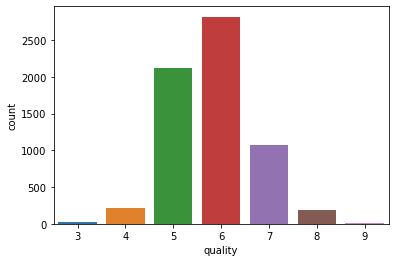

In [7]:
sns.countplot(df['quality'])
plt.show()

In [8]:
df['quality'].value_counts()

6    2820
5    2128
7    1074
4     214
8     192
3      30
9       5
Name: quality, dtype: int64

*The count of Quality of wine is max at 6 and count is 2836

*The quality of wine most preffered has quality "6"

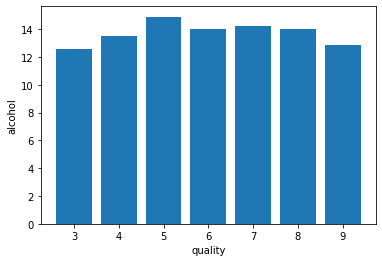

In [9]:
plt.bar(df['quality'],df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

* The quality of alcohol increases with increase in alcohol content.

<Figure size 432x288 with 0 Axes>

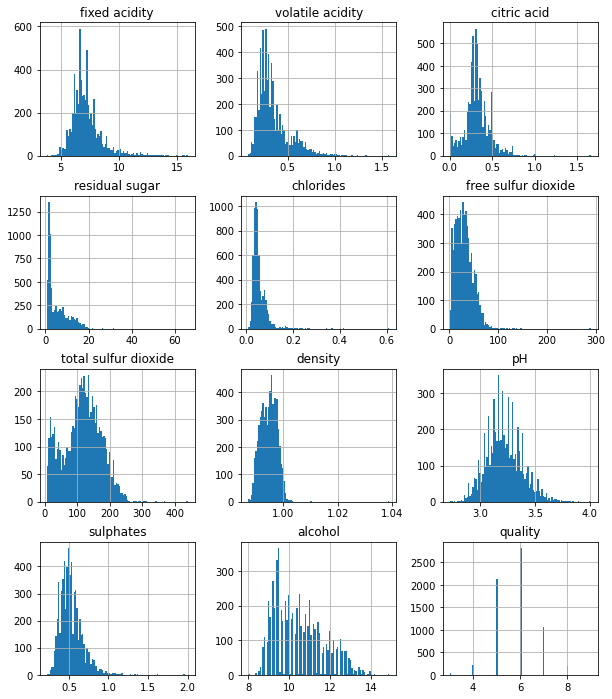

In [10]:
 plt.tight_layout()
df.hist(bins = 100, figsize = (10,12))
plt.show()

* Checking the correlation: 

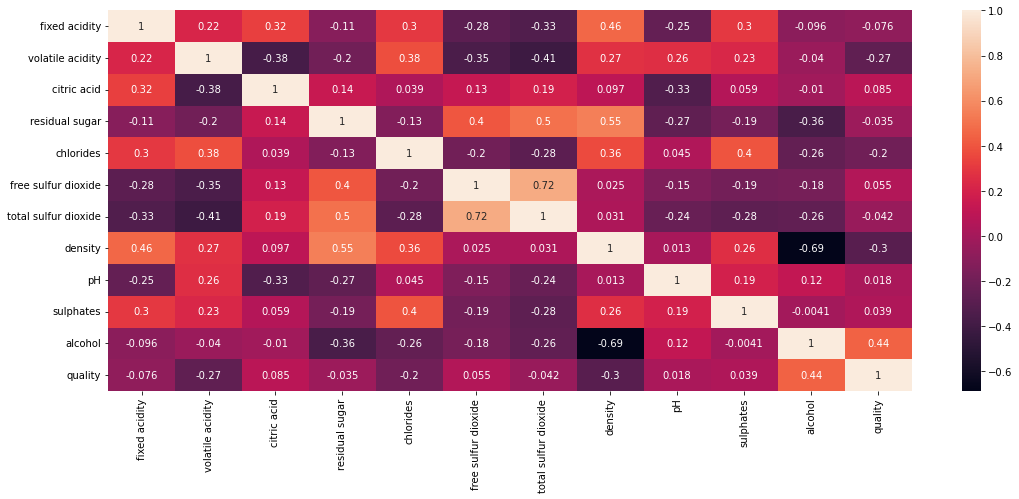

In [11]:
# correlation by visualization
plt.figure(figsize=[18,7])
# plot correlation
sns.heatmap(df.corr(),annot=True)
plt.show()

Total sulphur dioxide has higher correlation we can retain or discard the column

In [12]:
df_wine = df.drop('total sulfur dioxide',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6463 non-null   object 
 1   fixed acidity         6463 non-null   float64
 2   volatile acidity      6463 non-null   float64
 3   citric acid           6463 non-null   float64
 4   residual sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free sulfur dioxide   6463 non-null   float64
 7   total sulfur dioxide  6463 non-null   float64
 8   density               6463 non-null   float64
 9   pH                    6463 non-null   float64
 10  sulphates             6463 non-null   float64
 11  alcohol               6463 non-null   float64
 12  quality               6463 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 964.9+ KB


* Creating a dummy of data

In [13]:
df_dummy = pd.get_dummies(df,drop_first=True)
df_dummy.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [14]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6463 non-null   float64
 1   volatile acidity      6463 non-null   float64
 2   citric acid           6463 non-null   float64
 3   residual sugar        6463 non-null   float64
 4   chlorides             6463 non-null   float64
 5   free sulfur dioxide   6463 non-null   float64
 6   total sulfur dioxide  6463 non-null   float64
 7   density               6463 non-null   float64
 8   pH                    6463 non-null   float64
 9   sulphates             6463 non-null   float64
 10  alcohol               6463 non-null   float64
 11  quality               6463 non-null   int64  
 12  type_white            6463 non-null   uint8  
dtypes: float64(11), int64(1), uint8(1)
memory usage: 920.7 KB


In [15]:
df_dummy1 = df_dummy.drop(['type_white'],axis=1)

In [16]:
df_dummy1['best quality']=[1 if x>=7 else 0 for x in df.quality]
print(df_dummy1)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6491            6.8             0.620         0.08             1.9      0.068   
6492            6.2             0.600         0.08             2.0      0.090   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [17]:
df_dummy1['best quality'].value_counts()

0    5192
1    1271
Name: best quality, dtype: int64

In [18]:
# independent variables
x = df_dummy1.drop(['quality','best quality'],axis=1)
# dependent variable
y = df_dummy1['best quality']

# creating train test splits
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

# LogisticRegression

In [19]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [20]:
y_pred = lr.predict(X_test)
y_pred_prob = lr.predict_proba(X_test)[:,1]

In [21]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[1512,   54],
       [ 295,   78]], dtype=int64)

In [22]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1566
           1       0.59      0.21      0.31       373

    accuracy                           0.82      1939
   macro avg       0.71      0.59      0.60      1939
weighted avg       0.79      0.82      0.78      1939



In [23]:
roc  =  roc_auc_score(y_test, y_pred)
acc  =  accuracy_score(y_test, y_pred)
prec =  precision_score(y_test, y_pred)
rec  =  recall_score(y_test, y_pred)
f1   =  f1_score(y_test, y_pred)

# Decision Tree

In [24]:
model_1 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model_1.fit(X_train,y_train)
y_pred1 = model_1.predict(X_test)

roc_dt  =  roc_auc_score(y_test, y_pred1)
acc_dt  =  accuracy_score(y_test, y_pred1)
prec_dt =  precision_score(y_test, y_pred1)
rec_dt  =  recall_score(y_test, y_pred1)
f1_dt   =  f1_score(y_test, y_pred1)

# RandomForest

In [25]:
rf = RandomForestClassifier(random_state = 1)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

Confusion Matrix

In [26]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[1512,   54],
       [ 295,   78]], dtype=int64)

Classification Report

In [27]:
cr = classification_report(y_test, y_pred_rf)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1566
           1       0.80      0.58      0.67       373

    accuracy                           0.89      1939
   macro avg       0.85      0.77      0.80      1939
weighted avg       0.89      0.89      0.88      1939



In [28]:
roc_rf  =  roc_auc_score(y_test, y_pred_rf)
acc_rf  =  accuracy_score(y_test, y_pred_rf)
prec_rf =  precision_score(y_test, y_pred_rf)
rec_rf  =  recall_score(y_test, y_pred_rf)
f1_rf   =  f1_score(y_test, y_pred_rf)

# KNN

In [29]:
model_2 = KNeighborsClassifier(n_neighbors=3)
model_2.fit(X_train,y_train)
y_pred2 = model_2.predict(X_test)

In [30]:
roc_knn  =  roc_auc_score(y_test, y_pred2)
acc_knn =  accuracy_score(y_test, y_pred2)
prec_knn =  precision_score(y_test, y_pred2)
rec_knn =  recall_score(y_test, y_pred2)
f1_knn =  f1_score(y_test, y_pred2)

In [31]:
df_table= pd.DataFrame([['Logistic Regression', acc, prec, rec, f1, roc],
                      ['Random Forest Classifier', acc_rf, prec_rf, rec_rf, f1_rf, roc_rf],
                       ['Decision Tree',acc_dt, prec_dt, rec_dt, f1_dt, roc_dt],
                       ['KNN',acc_knn, prec_knn, rec_knn, f1_knn, roc_knn]],
                      columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
df_table

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.820010,0.590909,0.209115,0.308911,0.587316
1,Random Forest Classifier,0.891181,0.795620,0.584450,0.673879,0.774345
2,Decision Tree,0.841155,0.579075,0.638070,0.607143,0.763799
3,KNN,0.811759,0.512987,0.423592,0.464023,0.663904


* 1 represents the quality greater than 0.7 which is considered in good quality wine
* 0 represents the quality below 0.7 which is not a good quality wine.